In [1]:
from firebase_admin import credentials, initialize_app, db
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np

### Get Data dari Firebase

In [2]:
cred = credentials.Certificate({
    "type": "",
    "project_id": "",
    "private_key_id": "",
    "private_key": "",
    "client_email": ",
    "client_id": "",
    "auth_uri": ",
    "token_uri": "",
    "auth_provider_x509_cert_url": "",
    "client_x509_cert_url": "",
    "universe_domain": ""
})

initialize_app(cred, {"databaseURL": "https://datasensorairtambakudang-default-rtdb."})

In [3]:
db_ref = db.reference('air_tambak')
get_data = db_ref.get()
df = pd.DataFrame(get_data)
df = df.T
df

,ph,suhu,tds
2024-01-09 14:01,6.15636,30.5000,1.53350
2024-01-09 14:16,7.20735,31.8125,1.64560
2024-01-09 14:31,6.16948,31.7500,1.67102
2024-01-09 14:46,6.53777,31.7500,1.68186
2024-01-09 15:02,7.88636,31.8125,1.66165
...,...,...,...
2024-03-07 11:41:02,2.38817,25.4375,0.00000
2024-03-07 11:46:02,NaN,25.4375,NaN
2024-03-07 11:51:03,1.66227,25.4375,0.00000
2024-03-07 11:56:02,1.79451,25.4375,0.00000


In [4]:
df.index = pd.to_datetime(df.index)

# Round down the index values to the nearest minute
df.index = df.index.floor('T')

df.index = df.index.strftime('%Y-%m-%d %H:%M')

In [5]:
df = df.head(33)

In [6]:
df

,ph,suhu,tds
2024-01-09 14:01,6.15636,30.5000,1.533500
2024-01-09 14:16,7.20735,31.8125,1.645600
2024-01-09 14:31,6.16948,31.7500,1.671020
2024-01-09 14:46,6.53777,31.7500,1.681860
2024-01-09 15:02,7.88636,31.8125,1.661650
2024-01-09 15:17,6.99847,31.9375,1.665520
2024-01-09 15:32,7.21207,31.8125,1.665950
2024-01-09 15:47,8.07555,31.8750,1.690130
2024-01-09 16:02,6.52076,31.8125,1.689800
2024-01-12 12:10,7.23724,32.5625,1.567640


In [7]:
df.describe()

,ph,suhu,tds
count,33.000000,33.000000,33.000000
mean,6.803375,32.674242,1.551233
std,0.812182,0.785575,0.083022
min,5.392920,30.500000,1.410500
25%,6.169480,31.875000,1.493550
50%,6.864920,32.875000,1.533500
75%,7.272820,33.375000,1.603130
max,8.224530,33.750000,1.690130


In [8]:
df.isnull().sum()

ph      0
suhu    0
tds     0
dtype: int64

In [9]:
df=df.dropna()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, 2024-01-09 14:01 to 2024-01-13 14:22
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ph      33 non-null     float64
 1   suhu    33 non-null     float64
 2   tds     33 non-null     float64
dtypes: float64(3)
memory usage: 1.0+ KB


In [ ]:
from scipy.stats import norm, ks_1samp

columns_to_test = ['ph', 'suhu', 'tds']

for column_name in columns_to_test:
    data = df[column_name].values
    mean = np.mean(data)
    stddev = np.std(data)

    normalized_data = (data - mean) / stddev

    ks_statistic, p_value = ks_1samp(normalized_data, norm.cdf, args=(mean, stddev))

    if p_value > 0.05:
        print(f"The data in column '{column_name}' may come from a normal distribution (p-value = {p_value:.3f}).")
    else:
        print(f"The data in column '{column_name}' does not appear to come from a normal distribution (p-value = {p_value:.3f}).")

<AxesSubplot:>

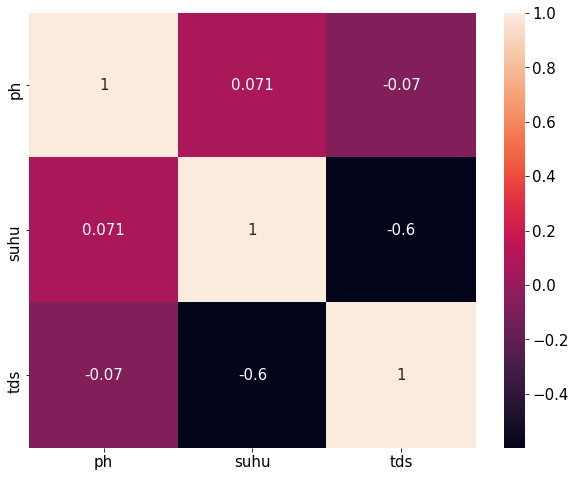

In [11]:
plt.rcParams['font.size'] = 15
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

### Labeling Data

In [13]:
def LabelStatus (df):
    def label_ph(ph):
        if 7.50 <= ph <= 8.50:
            return 'Sesuai'
        elif 7.00 <= ph <7.50 or 8.50 < ph <= 9.00:
            return 'Waspada'
        elif 0 <= ph <7.00 or 9.00 < ph <= 14.00:
            return 'Buruk'
        else:
            return 'Eror'

    def label_suhu(suhu):
        if suhu >= 27.00:
            return 'Sesuai'
        elif 25.50 <= suhu < 27.00:
            return 'Waspada'
        else:
            return 'Buruk'
    
    def label_tds(tds):
        if 0.15<= tds <= 0.20:
            return 'Sesuai'
        elif 0.10 <= tds < 0.15 or 0.20 < tds <= 0.25:
            return 'Waspada'
        elif 0 <= tds < 0.10 or tds > 0.25:
            return 'Buruk'
        else:
            return 'Eror'
        
    df['status_ph'] = df['ph'].apply(label_ph)
    df['status_suhu'] = df['suhu'].apply(label_suhu)
    df['status_tds'] = df['tds'].apply(label_tds)
    return df

In [14]:
df = LabelStatus(df)
df

,ph,suhu,tds,status_ph,status_suhu,status_tds
2024-01-09 14:01,6.15636,30.5000,1.533500,Buruk,Sesuai,Buruk
2024-01-09 14:16,7.20735,31.8125,1.645600,Waspada,Sesuai,Buruk
2024-01-09 14:31,6.16948,31.7500,1.671020,Buruk,Sesuai,Buruk
2024-01-09 14:46,6.53777,31.7500,1.681860,Buruk,Sesuai,Buruk
2024-01-09 15:02,7.88636,31.8125,1.661650,Sesuai,Sesuai,Buruk
2024-01-09 15:17,6.99847,31.9375,1.665520,Buruk,Sesuai,Buruk
2024-01-09 15:32,7.21207,31.8125,1.665950,Waspada,Sesuai,Buruk
2024-01-09 15:47,8.07555,31.8750,1.690130,Sesuai,Sesuai,Buruk
2024-01-09 16:02,6.52076,31.8125,1.689800,Buruk,Sesuai,Buruk
2024-01-12 12:10,7.23724,32.5625,1.567640,Waspada,Sesuai,Buruk


### Visualisasi Data

Text(0, 0.5, 'pH value')

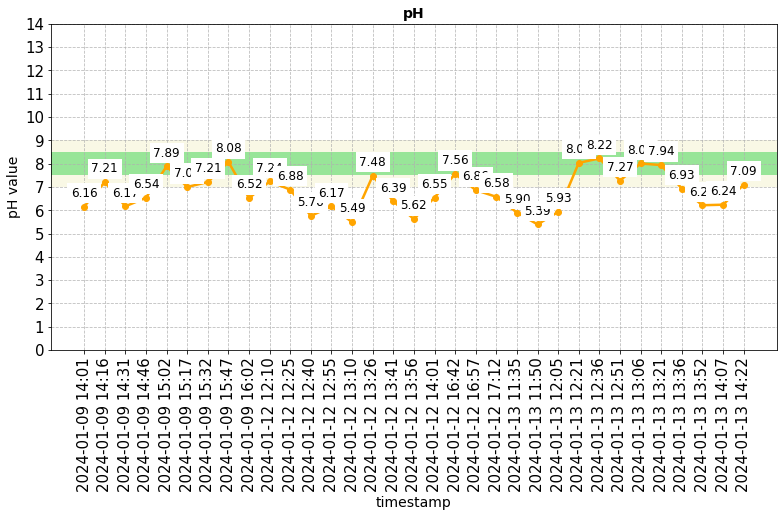

In [15]:
fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(df.index, df['ph'], marker='o', linestyle='-', color='orange',linewidth=2.5)

ax.grid(True, linestyle='--', alpha=0.85)
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax.set_ylim(bottom=0,top=14)
for i, txt in enumerate(df['ph']):
    bbox_props = dict(boxstyle="square,pad=0.3", fc="white", ec="none", alpha=1)
    ax.annotate(f'{txt:.2f}', (df.index[i], txt), textcoords="offset points", xytext=(0,10), ha='center', bbox=bbox_props,fontsize=12)

plt.axhspan(7.5,8.5, facecolor='limegreen', alpha=0.50)
plt.axhspan(7,7.5, facecolor='palegoldenrod', alpha=0.30)
plt.axhspan(8.5,9, facecolor='palegoldenrod', alpha=0.30)

plt.title('pH',fontsize=14, weight='bold')
plt.xlabel('timestamp',fontsize=14)
plt.xticks(rotation=90)
plt.ylabel('pH value',fontsize=14)

Text(0, 0.5, 'temperature value (°C)')

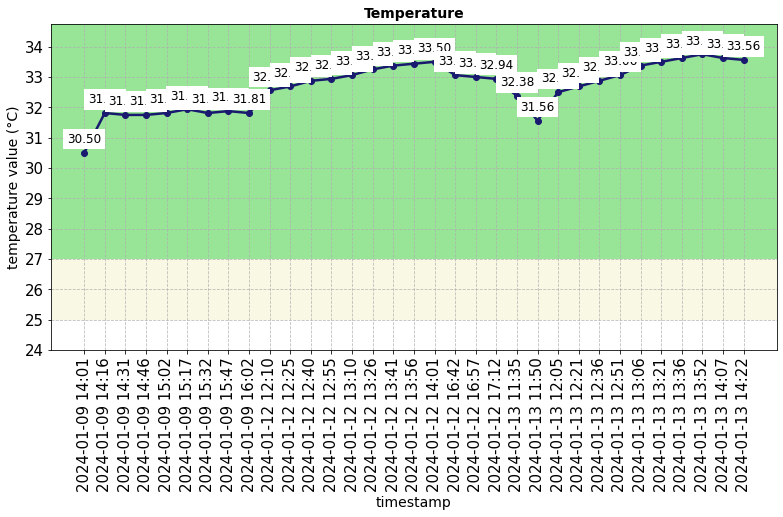

In [16]:
fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(df.index, df['suhu'], marker='o', linestyle='-', color='midnightblue',linewidth=2.5)

ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax.set_ylim(bottom=24, top=(df['suhu'].max())+1)
ax.grid(True, linestyle='--', alpha=0.85)
for i, txt in enumerate(df['suhu']):
    bbox_props = dict(boxstyle="square,pad=0.3", fc="white", ec="none", alpha=1)
    ax.annotate(f'{txt:.2f}', (df.index[i], txt), textcoords="offset points", xytext=(0,10), ha='center', bbox=bbox_props,fontsize=12)

plt.axhspan(27, (df['suhu'].max())+1, facecolor='limegreen', alpha=0.50)
plt.axhspan(25,27, facecolor='palegoldenrod', alpha=0.30)


plt.title('Temperature',fontsize=14, weight='bold')
plt.xlabel('timestamp',fontsize=14)
plt.xticks(rotation=90)
plt.ylabel('temperature value (°C)',fontsize=14)

Text(0, 0.5, 'tds value (ppt)')

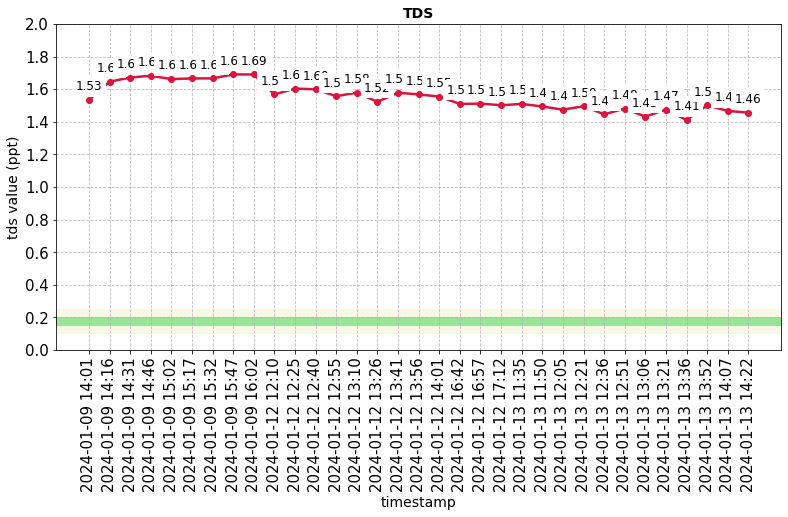

In [17]:
fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(df.index, df['tds'], marker='o', linestyle='-', color='crimson',linewidth=2.5)

ax.grid(True, linestyle='--', alpha=0.85)
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.2))
ax.set_ylim( bottom = 0, top=2)

for i, txt in enumerate(df['tds']):
    bbox_props = dict(boxstyle="square,pad=0.3", fc="white", ec="none", alpha=1)
    ax.annotate(f'{txt:.2f}', (df.index[i], txt), textcoords="offset points", xytext=(0,10), ha='center', bbox=bbox_props,fontsize=12)

plt.axhspan(0.15,0.20, facecolor='limegreen', alpha=0.50)
plt.axhspan(0.10,0.15, facecolor='palegoldenrod', alpha=0.30)
plt.axhspan(0.20,0.25, facecolor='palegoldenrod', alpha=0.30)


plt.title('TDS',fontsize=14, weight='bold')
plt.xlabel('timestamp',fontsize=14)
plt.xticks(rotation=90)
plt.ylabel('tds value (ppt)',fontsize=14)

In [18]:
def barplot_cek(dataframe, column):
    # Pengaturan warna sesuai dengan kategori
    colorpalette = {'Sesuai': 'seagreen', 'Waspada': 'sandybrown', 'Buruk': 'firebrick', 'Eror': 'dimgray'}
    #pengaturan urutan
    order = ["Sesuai", "Waspada", "Buruk","Eror"]
    #pembuatan barplot
    plt.figure(figsize=(10,8))
    ax = sns.countplot(data=dataframe, x=column, palette=colorpalette, order=order)
    plt.title(f'Jumlah Data {column}',fontsize=14, weight='bold')
    plt.xlabel(column, fontsize=13)
    plt.ylabel('Jumlah Data',fontsize=13)

    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline',fontsize=14,)

    plt.show()

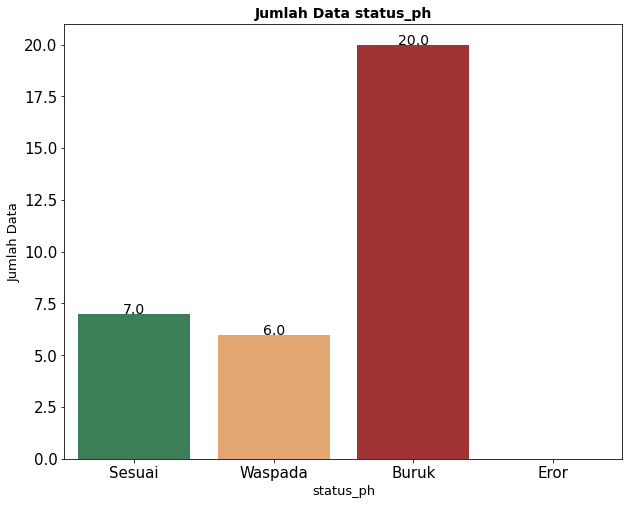

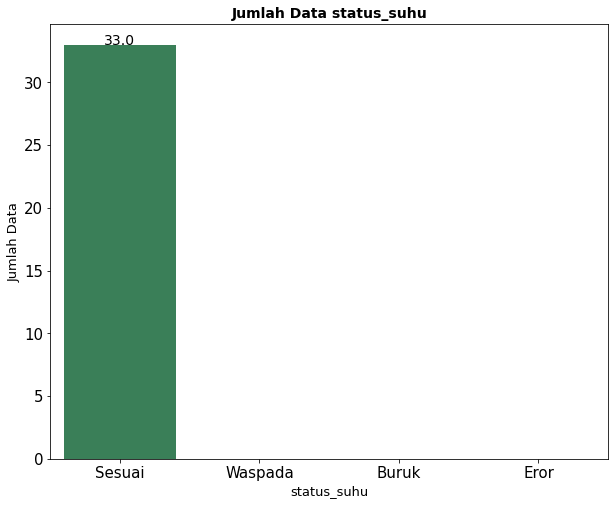

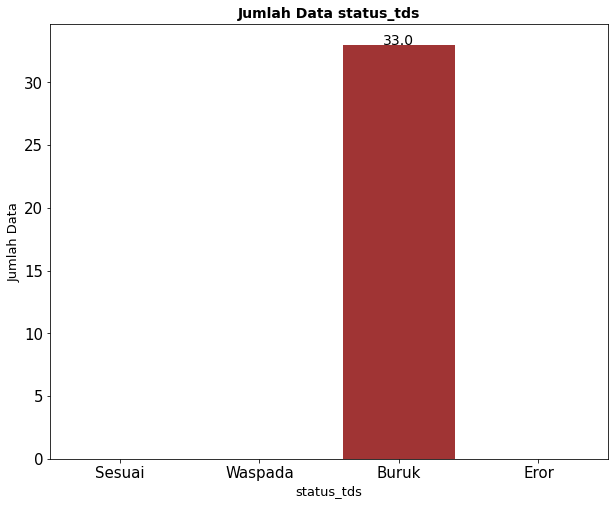

In [19]:
barplot_cek(df,'status_ph')
barplot_cek(df,'status_suhu')
barplot_cek(df,'status_tds')

### Mapping Data

In [20]:
df_uji = df.copy()
df_uji = df_uji.drop(['ph', 'suhu', 'tds'], axis=1)
#kolom yang akan di encoder
kolom_map = ['status_ph', 'status_suhu', 'status_tds']

label_mapping = {
    'status_ph': {'Buruk': 0, 'Waspada': 1, 'Sesuai': 2, 'Eror': 3},
    'status_suhu': {'Buruk': 0, 'Waspada': 1, 'Sesuai': 2},
    'status_tds': {'Buruk': 0, 'Waspada': 1, 'Sesuai': 2, 'Eror': 3},
}

for column in kolom_map:
    df_uji[column] = df_uji[column].map(label_mapping[column])

df_uji

,status_ph,status_suhu,status_tds
2024-01-09 14:01,0,2,0
2024-01-09 14:16,1,2,0
2024-01-09 14:31,0,2,0
2024-01-09 14:46,0,2,0
2024-01-09 15:02,2,2,0
2024-01-09 15:17,0,2,0
2024-01-09 15:32,1,2,0
2024-01-09 15:47,2,2,0
2024-01-09 16:02,0,2,0
2024-01-12 12:10,1,2,0


### Get Data untuk Training

In [21]:
db_ref = db.reference('sensor_data')
get_data = db_ref.get()
df_train = pd.DataFrame(get_data)
df_train = df_train.T
df_train

,ph,suhu,tds
2024-01-19 15:05:53,8.29702,27.8750,1.614070
2024-01-19 15:07:53,7.95103,27.8125,1.515378
2024-01-19 15:09:53,8.11156,27.8125,1.509800
2024-01-19 15:11:53,8.47022,27.7500,1.506790
2024-01-19 15:13:53,8.20969,27.7500,1.415116
...,...,...,...
2024-02-05 21:41:23,7.91738,28.5400,1.444510
2024-02-05 21:44:23,8.21208,28.4940,1.392610
2024-02-05 21:47:23,7.54452,28.4000,1.379200
2024-02-05 21:50:23,8.21336,28.3750,1.355820


In [22]:
df_train = LabelStatus(df_train)
df_train

,ph,suhu,tds,status_ph,status_suhu,status_tds
2024-01-19 15:05:53,8.29702,27.8750,1.614070,Sesuai,Sesuai,Buruk
2024-01-19 15:07:53,7.95103,27.8125,1.515378,Sesuai,Sesuai,Buruk
2024-01-19 15:09:53,8.11156,27.8125,1.509800,Sesuai,Sesuai,Buruk
2024-01-19 15:11:53,8.47022,27.7500,1.506790,Sesuai,Sesuai,Buruk
2024-01-19 15:13:53,8.20969,27.7500,1.415116,Sesuai,Sesuai,Buruk
...,...,...,...,...,...,...
2024-02-05 21:41:23,7.91738,28.5400,1.444510,Sesuai,Sesuai,Buruk
2024-02-05 21:44:23,8.21208,28.4940,1.392610,Sesuai,Sesuai,Buruk
2024-02-05 21:47:23,7.54452,28.4000,1.379200,Sesuai,Sesuai,Buruk
2024-02-05 21:50:23,8.21336,28.3750,1.355820,Sesuai,Sesuai,Buruk


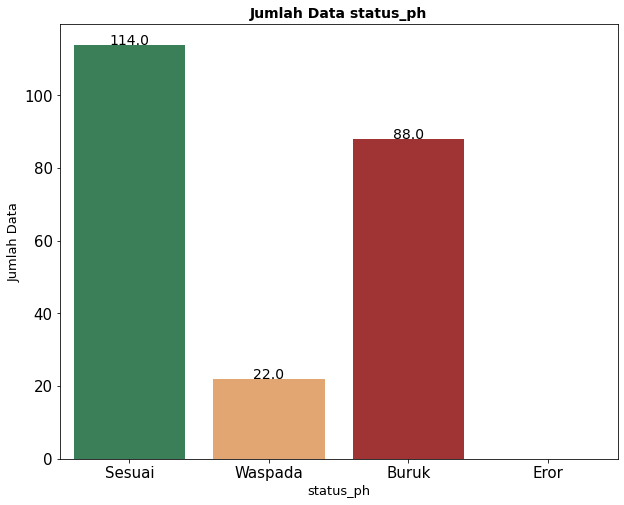

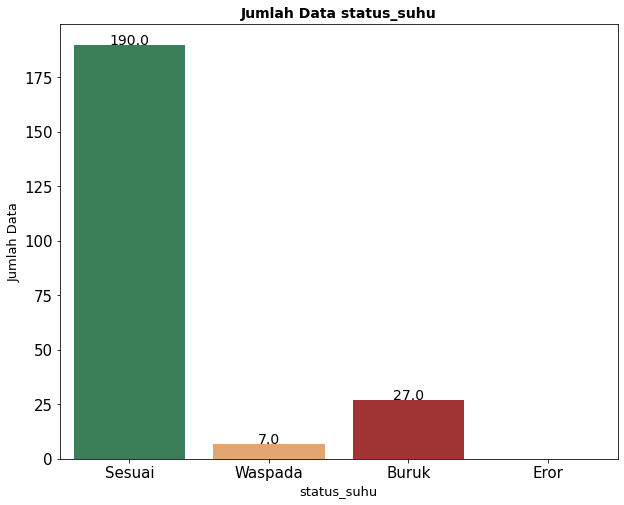

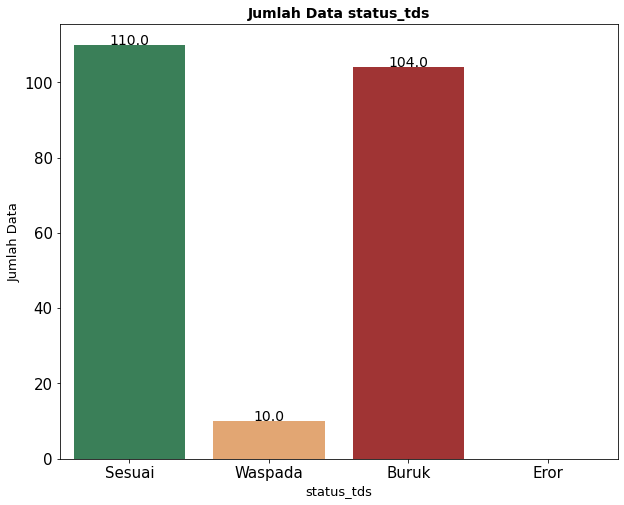

In [23]:
barplot_cek(df_train,'status_ph')
barplot_cek(df_train,'status_suhu')
barplot_cek(df_train,'status_tds')

In [24]:
#Pembuatan kolom target "status_sni"
def StatusrSNI(df):
    
    df['status_sni'] = None
    df['ketidaksesuaian'] = None

    # Cek apakah semua kolom 'status_ph', 'status_suhu', dan 'status_tds' adalah 'Sesuai'
    for index, row in df.iterrows():
        tidak_sesuai_baris = []
        SNI = True
        
        if row['status_ph'] != 'Sesuai':
            tidak_sesuai_baris.append(f'status_ph: {row["status_ph"]}')
            SNI = False
        if row['status_suhu'] != 'Sesuai':
            tidak_sesuai_baris.append(f'status_suhu: {row["status_suhu"]}')
            SNI = False
        if row['status_tds'] != 'Sesuai':
            tidak_sesuai_baris.append(f'status_tds: {row["status_tds"]}')
            SNI = False

        
        if SNI == False: 
            df.at[index, 'status_sni'] = 'Belum Memenuhi'
            df.at[index, 'ketidaksesuaian'] = ', '.join(tidak_sesuai_baris)
        elif SNI == True:
            df.at[index, 'status_sni'] = 'Memenuhi'
    return df

In [25]:
df_train = StatusrSNI(df_train)
df_train

,ph,suhu,tds,status_ph,status_suhu,status_tds,status_sni,ketidaksesuaian
2024-01-19 15:05:53,8.29702,27.8750,1.614070,Sesuai,Sesuai,Buruk,Belum Memenuhi,status_tds: Buruk
2024-01-19 15:07:53,7.95103,27.8125,1.515378,Sesuai,Sesuai,Buruk,Belum Memenuhi,status_tds: Buruk
2024-01-19 15:09:53,8.11156,27.8125,1.509800,Sesuai,Sesuai,Buruk,Belum Memenuhi,status_tds: Buruk
2024-01-19 15:11:53,8.47022,27.7500,1.506790,Sesuai,Sesuai,Buruk,Belum Memenuhi,status_tds: Buruk
2024-01-19 15:13:53,8.20969,27.7500,1.415116,Sesuai,Sesuai,Buruk,Belum Memenuhi,status_tds: Buruk
...,...,...,...,...,...,...,...,...
2024-02-05 21:41:23,7.91738,28.5400,1.444510,Sesuai,Sesuai,Buruk,Belum Memenuhi,status_tds: Buruk
2024-02-05 21:44:23,8.21208,28.4940,1.392610,Sesuai,Sesuai,Buruk,Belum Memenuhi,status_tds: Buruk
2024-02-05 21:47:23,7.54452,28.4000,1.379200,Sesuai,Sesuai,Buruk,Belum Memenuhi,status_tds: Buruk
2024-02-05 21:50:23,8.21336,28.3750,1.355820,Sesuai,Sesuai,Buruk,Belum Memenuhi,status_tds: Buruk


In [26]:
df_train['status_sni'].value_counts()

Belum Memenuhi    194
Memenuhi           30
Name: status_sni, dtype: int64

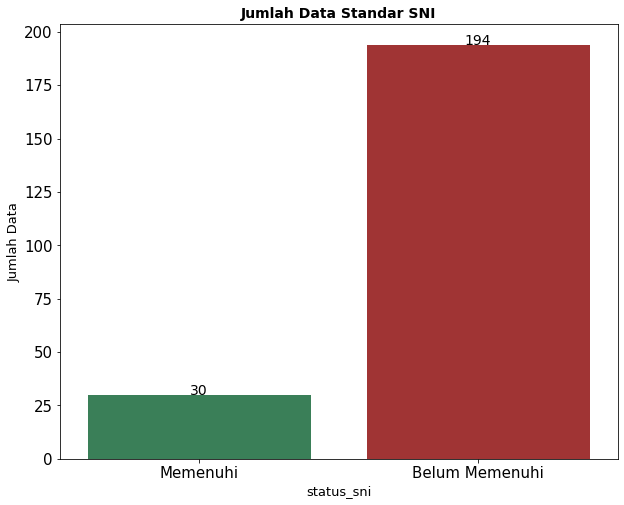

In [27]:
plt.figure(figsize=(10,8))
colorpalette = {'Memenuhi': 'seagreen', 'Belum Memenuhi': 'firebrick'}
order = ["Memenuhi", "Belum Memenuhi"]
ax = sns.countplot(data=df_train, x='status_sni', palette=colorpalette, order=order)
plt.title('Jumlah Data Standar SNI',fontsize=14, weight='bold')
plt.xlabel('status_sni',fontsize=13)
plt.ylabel('Jumlah Data',fontsize=13)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline',fontsize=14)

In [28]:
#Mapping data train
df_map = df_train.copy()

df_map=df_map.drop(columns=['ph', 'suhu', 'tds','ketidaksesuaian'])

#kolom yang akan di encoder
kolom_map = ['status_ph', 'status_suhu', 'status_tds', 'status_sni']

# Dictionary untuk mapping label kategori
    #Untuk Parameter pH, Suhu, TDS:
        #label 0 = label 'Buruk'
        #label 1 = label 'Waspada'
        #label 2 = label 'Sesuai'
        #label 3 = label 'Eror'

    #Untuk Status SNI:
        #label 0 = label 'Belum Memenuhi'
        #label 1 = label 'Sudah Memenuhi'
        
label_mapping = {
    'status_ph': {'Buruk': 0, 'Waspada': 1, 'Sesuai': 2, 'Eror': 3},
    'status_suhu': {'Buruk': 0, 'Waspada': 1, 'Sesuai': 2},
    'status_tds': {'Buruk': 0, 'Waspada': 1, 'Sesuai': 2, 'Eror': 3},
    'status_sni': {'Belum Memenuhi': 0 , 'Memenuhi': 1}
}

for column in kolom_map:
    df_map[column] = df_map[column].map(label_mapping[column])
    
df_map['status_ph'] = df_map['status_ph'].astype(int)
df_map['status_suhu'] = df_map['status_suhu'].astype(int)
df_map['status_tds'] = df_map['status_tds'].astype(int)

print('Dataframe Map')
df_map

Dataframe Map


,status_ph,status_suhu,status_tds,status_sni
2024-01-19 15:05:53,2,2,0,0
2024-01-19 15:07:53,2,2,0,0
2024-01-19 15:09:53,2,2,0,0
2024-01-19 15:11:53,2,2,0,0
2024-01-19 15:13:53,2,2,0,0
...,...,...,...,...
2024-02-05 21:41:23,2,2,0,0
2024-02-05 21:44:23,2,2,0,0
2024-02-05 21:47:23,2,2,0,0
2024-02-05 21:50:23,2,2,0,0


### Pembentukan Model

##### OVERSAMPLING

In [29]:
#upsample

from sklearn.utils import resample

# pembuatan dataframe majority dan minority
df_majority = df_map[(df_map['status_sni']==0)] 
df_minority = df_map[(df_map['status_sni']==1)] 

# uppersample/oversample minority
df_minority_upsampled = resample(df_minority, 
                                replace=True, 
                                n_samples=194, 
                                random_state=42)

# menggabungkan df_majority dan df_minority
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

In [30]:
df_upsampled['status_sni'].value_counts()

0    194
1    194
Name: status_sni, dtype: int64

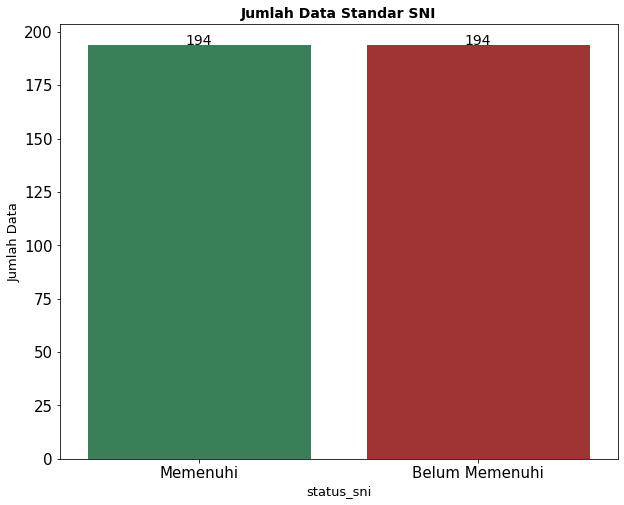

In [31]:
plt.figure(figsize=(10,8))
colorpalette = {1: 'seagreen', 0: 'firebrick'}
order = [1, 0]
ax = sns.countplot(data=df_upsampled, x='status_sni', palette=colorpalette ,order=order)
plt.title('Jumlah Data Standar SNI',fontsize=14, weight='bold')
plt.xlabel('status_sni',fontsize=13)
plt.ylabel('Jumlah Data',fontsize=13)
# Change x-axis labels
ax.set_xticklabels(['Memenuhi', 'Belum Memenuhi'])

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline',fontsize=14)

##### SPLIT DATA

In [32]:
from sklearn.model_selection import train_test_split

X = df_upsampled.loc[:, df_upsampled.columns != 'status_sni']
y = df_upsampled['status_sni']

# splitting X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

##### Pemberingan *weight*

In [33]:
from sklearn.neighbors import KernelDensity
kde = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(X_train)
log_r = kde.score_samples(X_test)
r = np.exp(log_r - np.mean(log_r))

##### Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

class_weights = np.mean(r) / np.bincount(y_train)
class_weight_dict = {i: w for i, w in enumerate(class_weights)}

rf=RandomForestClassifier(random_state=42, n_jobs=-1, class_weight=class_weight_dict)

# Hyperparamter tuning dengan menggunakan Grid Search
params = {'max_depth': [3,5,10,15],
          'min_samples_leaf': [10,15,25,50],
          'n_estimators': [2,5,7,10],
        }

grid_search_rf = GridSearchCV(estimator=rf,
                            param_grid=params,
                            cv = 5,
                            n_jobs=1, verbose=1, scoring="accuracy", error_score='raise')

grid_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


GridSearchCV(cv=5, error_score='raise',
             estimator=RandomForestClassifier(class_weight={0: 0.012207078240798216,
                                                            1: 0.011764792797291035},
                                              n_jobs=-1, random_state=42),
             n_jobs=1,
             param_grid={'max_depth': [3, 5, 10, 15],
                         'min_samples_leaf': [10, 15, 25, 50],
                         'n_estimators': [2, 5, 7, 10]},
             scoring='accuracy', verbose=1)

In [35]:
print(grid_search_rf.best_params_)
best_score = grid_search_rf.best_score_
print("score parameter terbaik: ", best_score)

{'max_depth': 3, 'min_samples_leaf': 10, 'n_estimators': 2}
score parameter terbaik:  1.0


In [36]:
# Random Forest baru dengan parameter terbaik
randomforest = grid_search_rf.best_estimator_
randomforest.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.012207078240798216,
                                     1: 0.011764792797291035},
                       max_depth=3, min_samples_leaf=10, n_estimators=2,
                       n_jobs=-1, random_state=42)

In [37]:
y_pred_rf = randomforest.predict(X_test)

Confusion Matrix:


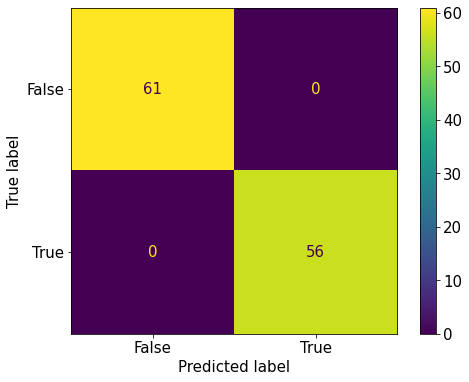

In [38]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

# Evaluasi dengan Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)

# Hasil
print("Confusion Matrix:")
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = [False, True])
fig, ax = plt.subplots(figsize=(8, 6))
cm_display.plot(ax=ax)
plt.show()

In [39]:
# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)

print("\nEvaluasi Model:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")


Evaluasi Model:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00


In [40]:
# Flip label
num_negative = np.count_nonzero(y_train == 0)
num_flips = int(num_negative * 0.50)

flip_indices = np.arange(num_negative)[:num_flips]
y_train[flip_indices] = 1

In [41]:
rf = grid_search_rf.best_estimator_
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.012207078240798216,
                                     1: 0.011764792797291035},
                       max_depth=3, min_samples_leaf=10, n_estimators=2,
                       n_jobs=-1, random_state=42)

In [42]:
y_pred_rf = rf.predict(X_test)

Confusion Matrix:


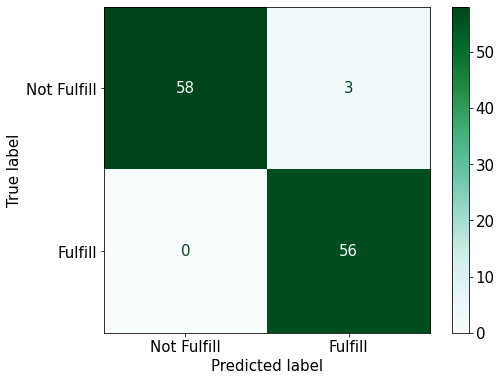

In [44]:
# Evaluasi dengan Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Hasil
print("Confusion Matrix:")
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix_rf, display_labels = ['Not Fulfill', 'Fulfill'])
fig, ax = plt.subplots(figsize=(8, 6))
cm_display.plot(ax=ax, cmap='BuGn')
plt.show()

In [45]:
# Menghitung metrik evaluasi
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)

print("\nEvaluasi Model:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")


Evaluasi Model:
Accuracy: 0.9744
Precision: 0.9492
Recall: 1.0000


##### KNN

In [46]:
from sklearn.neighbors import KNeighborsClassifier

param_grid = {"n_neighbors": [2,5,7,10]}

knn = KNeighborsClassifier()

grid_search_knn = GridSearchCV(knn, param_grid, cv=5, scoring="accuracy", error_score='raise')
grid_search_knn.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise', estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 5, 7, 10]}, scoring='accuracy')

In [47]:
print(grid_search_knn.best_params_)
best_score = grid_search_knn.best_score_
print("score parameter terbaik: ", best_score)

{'n_neighbors': 2}
score parameter terbaik:  0.812053872053872


In [48]:
knn = grid_search_knn.best_estimator_
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [49]:
y_pred_knn = knn.predict(X_test)

Confusion Matrix:


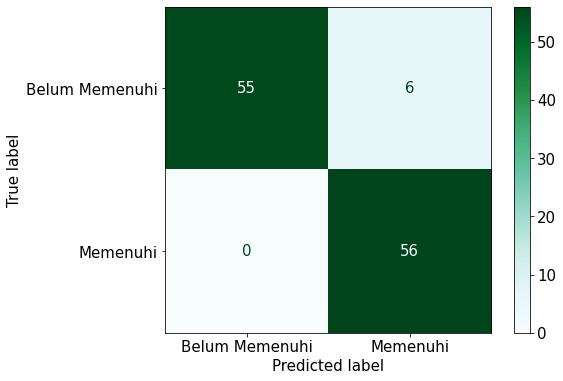

In [50]:
# Evaluasi dengan Confusion Matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# Hasil
print("Confusion Matrix:")
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix_knn, display_labels = ['Belum Memenuhi', 'Memenuhi'])
fig, ax = plt.subplots(figsize=(8, 6))
cm_display.plot(ax=ax, cmap='BuGn')
plt.show()

In [51]:
# Menghitung metrik evaluasi
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)

print("\nEvaluasi Model:")
print(f"Accuracy: {accuracy_knn:.4f}")
print(f"Precision: {precision_knn:.4f}")
print(f"Recall: {recall_knn:.4f}")


Evaluasi Model:
Accuracy: 0.9487
Precision: 0.9032
Recall: 1.0000


##### SVM

In [52]:
from sklearn import svm

params = {'C': [10,15,20,25],
          'gamma': [1, 0.1, 0.01, 0.001],
          'kernel': ['linear', 'rbf']}

svm = svm.SVC(random_state=42)

grid_search_svm = GridSearchCV(estimator=svm,
                              param_grid=params,
                              cv=5,
                              n_jobs=-1,
                              verbose=1,
                              scoring="accuracy",
                              error_score='raise')

grid_search_svm.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, error_score='raise', estimator=SVC(random_state=42),
             n_jobs=-1,
             param_grid={'C': [10, 15, 20, 25], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy', verbose=1)

In [53]:
print("Best parameters: ", grid_search_svm.best_params_)
print("Best score: ", grid_search_svm.best_score_)

Best parameters:  {'C': 25, 'gamma': 1, 'kernel': 'linear'}
Best score:  0.8823569023569025


In [54]:
svm = grid_search_svm.best_estimator_
svm.fit(X_train, y_train)

SVC(C=25, gamma=1, kernel='linear', random_state=42)

In [55]:
y_pred_svm = svm.predict(X_test)

Confusion Matrix:


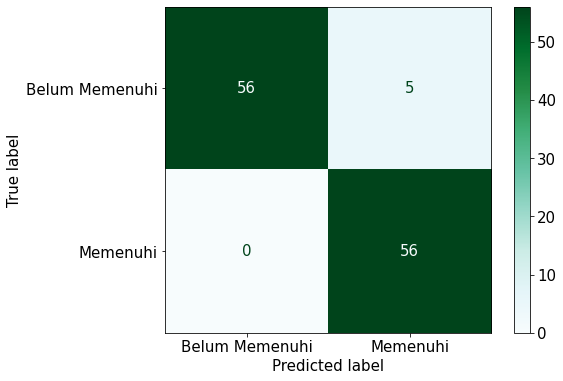

In [56]:
# Evaluasi dengan Confusion Matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Hasil
print("Confusion Matrix:")
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix_svm, display_labels = ['Belum Memenuhi', 'Memenuhi'])
fig, ax = plt.subplots(figsize=(8, 6))
cm_display.plot(ax=ax, cmap='BuGn')
plt.show()

In [57]:
# Menghitung metrik evaluasi
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)

print("\nEvaluasi Model:")
print(f"Accuracy: {accuracy_svm:.4f}")
print(f"Precision: {precision_svm:.4f}")
print(f"Recall: {recall_svm:.4f}")


Evaluasi Model:
Accuracy: 0.9573
Precision: 0.9180
Recall: 1.0000


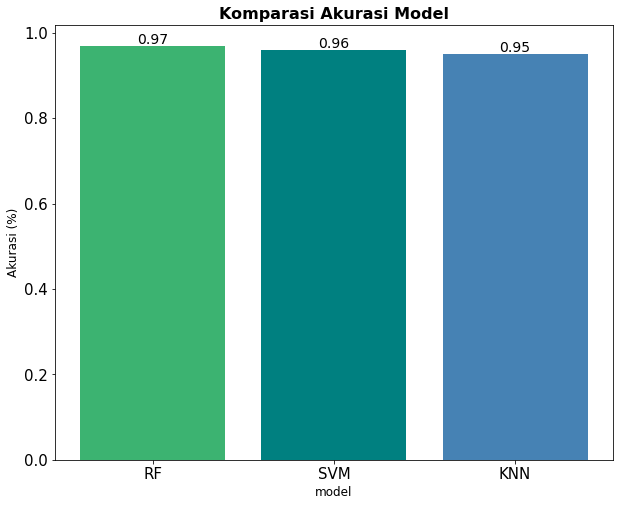

In [58]:
models = ['RF', 'SVM', 'KNN']
# accuracy_rf = accuracy_rf * 100
# accuracy_svm = accuracy_svm * 100
# accuracy_knn = accuracy_knn * 100
accuracies = [round(accuracy_rf, 2),  round(accuracy_svm, 2), round(accuracy_knn, 2)]

plt.figure(figsize=(10,8))
plt.bar(models, accuracies, color=['Mediumseagreen', 'Teal', 'Steelblue'])
plt.ylabel('Akurasi (%)', fontsize =12)
plt.xlabel('model', fontsize =12)
plt.title('Komparasi Akurasi Model', weight='bold', fontsize =16)


# Add labels and values to the bars
for i, v in enumerate(accuracies):
    plt.text(i, v+0.005, str(round(v, 3)), ha='center',fontsize =14)

plt.show()

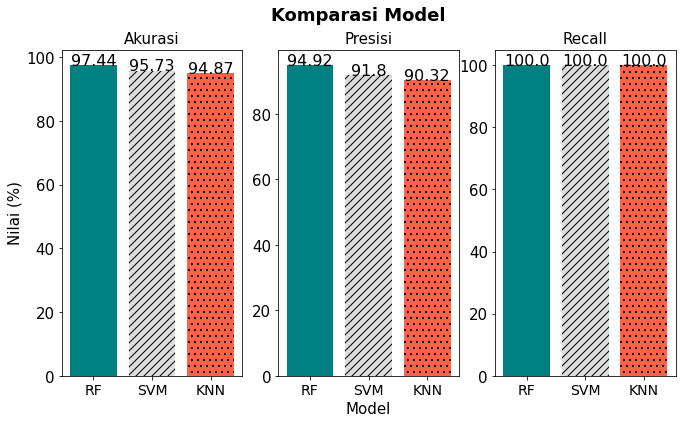

In [59]:
import matplotlib.pyplot as plt

models = ["RF","SVM", "KNN"]
accuracies = {"RF": round((accuracy_rf*100), 2), "SVM": round((accuracy_svm*100), 2), "KNN":round((accuracy_knn*100), 2)}
precision = {"RF":round((precision_rf*100), 2), "SVM": round((precision_svm*100), 2), "KNN":round((precision_knn*100), 2)}
recall = {"RF":round((recall_rf*100), 2), "SVM": round((recall_svm*100), 2), "KNN":round((recall_knn*100), 2)}

colors = {"RF":"teal","SVM": "gainsboro", "KNN": "tomato"}
hatches = {"RF": None,"SVM":"///", "KNN": ".."}
fig, axes = plt.subplots(1, 3, figsize=(11, 6))
fig.suptitle('Komparasi Model', weight='bold')

# Plot accuracy
for model, acc in accuracies.items():
    axes[0].bar(models.index(model), acc, color=colors[model], hatch=hatches.get(model), label=model)
    axes[0].text(models.index(model), acc + 0.005, str(acc), ha='center',fontsize=16)
axes[0].set_title("Akurasi",fontsize = 15)
axes[0].set_ylabel("Nilai (%)")

# Plot precision
for model, prec in precision.items():
    axes[1].bar(models.index(model), prec, color=colors[model], hatch=hatches.get(model), label=model)
    axes[1].text(models.index(model), prec + 0.005, str(prec), ha='center',fontsize=16)
axes[1].set_title("Presisi",fontsize = 15)
axes[1].set_xlabel("Model")

# Plot recall
for model, rec in recall.items():
    axes[2].bar(models.index(model), rec, color=colors[model], hatch=hatches.get(model), label=model)
    axes[2].text(models.index(model), rec + 0.005, str(rec), ha='center',fontsize=16)
axes[2].set_title("Recall",fontsize = 15)

# Set x-axis ticks and labels
for ax in axes:
    ax.set_xticks(range(len(models)))
    ax.set_xticklabels(models, fontsize=14)

# Show the plot
plt.show()

##### Feature Importance

In [60]:
importances = rf.feature_importances_
feature_names = X_train.columns

importances_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
importances_df['importance'] = np.round((importances_df['importance']*100), 2)

#Mengurutkan data
importances_df = importances_df.sort_values('importance', ascending=False)

print(importances_df)

       feature  importance
2   status_tds       50.70
0    status_ph       48.44
1  status_suhu        0.86


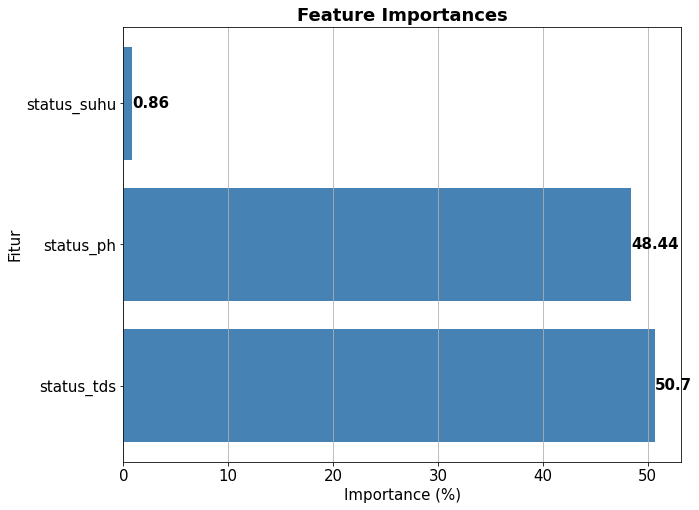

In [61]:
#bar plot feature importances
plt.figure(figsize=(10, 8))
bars = plt.barh(importances_df['feature'], importances_df['importance'], color = 'Steelblue')
plt.xlabel('Importance (%)')
plt.ylabel('Fitur')
plt.title('Feature Importances',fontweight='bold' )
plt.grid(True,axis='x')
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, round(bar.get_width(), 4), 
             ha='left', va='center', fontweight='bold')

plt.show()

##### Implementasi Model

In [ ]:
df_uji2 = df_uji.copy()
df_uji3 = df_uji.copy()


In [ ]:
classification = rf.predict(df_uji[['status_ph', 'status_suhu', 'status_tds']])
df_uji['status_sni'] = classification

In [ ]:
df_uji

In [ ]:
df_subset = df_map.sample(n=len(df_uji), random_state=42)
y_status_SNI = df_subset['status_sni']
y_pred_SNI = df_uji['status_sni']

In [ ]:
conf_matrix_SNI = confusion_matrix(y_status_SNI, y_pred_SNI)
print("Confusion Matrix:")

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix_SNI, display_labels = ['Belum Memenuhi', 'Memenuhi'])
fig, ax = plt.subplots(figsize=(8, 6))
cm_display.plot(ax=ax, cmap='BuGn')

In [ ]:
accuracy_SNI = accuracy_score(y_status_SNI, y_pred_SNI)
precision_SNI = precision_score(y_status_SNI, y_pred_SNI)
recall_SNI = recall_score(y_status_SNI, y_pred_SNI)

print("\nEvaluasi Kolom 'Status SNI':")
print(f"Accuracy: {accuracy_SNI:.4f}")
print(f"Precision: {precision_SNI:.4f}")
print(f"Recall: {recall_SNI:.4f}")

In [ ]:
kolom_map = ['status_ph', 'status_suhu', 'status_tds','status_sni']

label_mapping = {
    'status_ph': {0: 'Buruk', 1: 'Waspada', 2:'Sesuai', 3: 'Eror'},
    'status_suhu': {0: 'Buruk', 1: 'Waspada', 2:'Sesuai'},
    'status_tds': {0: 'Buruk', 1: 'Waspada', 2:'Sesuai', 3: 'Eror'},
    'status_sni': {0: 'Belum Memenuhi', 1: 'Memenuhi'},
}

for column in kolom_map:
    df_uji[column] = df_uji[column].map(label_mapping[column])

df_uji

In [ ]:
df_final = df.join(df_uji[['status_sni']], on=df.index)

In [ ]:
df_final

In [ ]:
df_final['ketidaksesuaian'] = None

for index, row in df.iterrows():
    tidak_sesuai_baris = []
    
    if row['status_ph'] != 'Sesuai':
        tidak_sesuai_baris.append(f'status_ph: {row["status_ph"]}')
    elif row['status_suhu'] != 'Sesuai':
        tidak_sesuai_baris.append(f'status_suhu: {row["status_suhu"]}')
    elif row['status_tds'] != 'Sesuai':
        tidak_sesuai_baris.append(f'status_tds: {row["status_tds"]}')

    df_final.at[index, 'ketidaksesuaian'] = ', '.join(tidak_sesuai_baris)
df_final

In [ ]:
df_final['rekomendasi_aksi'] = None
for index, row in df.iterrows():
    rekomendasi = []
    if row['status_ph'] != 'Sesuai':
        if row  ['ph'] < 7.5 :
            rekomendasi.append("Berikan Kalsium hidroksida (Ca(OH)2) 5-10 ppm")
        elif row ['ph'] > 8.5 :
            rekomendasi.append("Tebarkan Molase")
    if row['status_suhu'] != 'Sesuai':
        if row  ['suhu'] < 27 :
            rekomendasi.append("Kurangin pemberian makan")  
    if row['status_tds'] != 'Sesuai':
        if row  ['tds'] < 0.15 :
            rekomendasi.append("Tambahkan kadar mineral atau Tingkatkan populasi plankton")
        elif row ['tds'] > 0.20 :
            rekomendasi.append("Kuras Air Tambak")
            
    df_final.at[index, 'rekomendasi_aksi'] = ', '.join(rekomendasi)     
df_final


##### Implementasi SVM

In [ ]:
df_uji2

In [ ]:
classification2 = svm.predict(df_uji2[['status_ph', 'status_suhu', 'status_tds']])
df_uji2['status_sni'] = classification2

In [ ]:
df_uji2

In [ ]:
y_status_SNI = df_subset['status_sni']
y_pred_svm = df_uji2['status_sni']

In [ ]:
conf_matrix_SNI_svm = confusion_matrix(y_status_SNI, y_pred_svm)
print("Confusion Matrix:")

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix_SNI_svm, display_labels = ['Not Fulfill', 'Fulfill'])
fig, ax = plt.subplots(figsize=(8, 6))
cm_display.plot(ax=ax, cmap='BuGn')

In [ ]:
accuracy_SNI_svm = accuracy_score(y_status_SNI, y_pred_svm)
precision_SNI_svm = precision_score(y_status_SNI, y_pred_svm)
recall_SNI_svm = recall_score(y_status_SNI, y_pred_svm)

print("\nEvaluasi Kolom 'Status SNI':")
print(f"Accuracy: {accuracy_SNI_svm:.4f}")
print(f"Precision: {precision_SNI_svm:.4f}")
print(f"Recall: {recall_SNI_svm:.4f}")

##### implementasi knn

In [ ]:
df_uji3

In [ ]:
classification3 = knn.predict(df_uji3[['status_ph', 'status_suhu', 'status_tds']])
df_uji3['status_sni'] = classification3

In [ ]:
df_uji3

In [ ]:
y_pred_knn = df_uji3['status_sni']

In [ ]:
conf_matrix_SNI_knn = confusion_matrix(y_status_SNI, y_pred_knn)
print("Confusion Matrix:")

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix_SNI_knn, display_labels = ['Belum Memenuhi', 'Memenuhi'])
fig, ax = plt.subplots(figsize=(8, 6))
cm_display.plot(ax=ax, cmap='BuGn')

In [ ]:
accuracy_SNI_knn = accuracy_score(y_status_SNI, y_pred_knn)
precision_SNI_knn = precision_score(y_status_SNI, y_pred_knn)
recall_SNI_knn = recall_score(y_status_SNI, y_pred_knn)

print("\nEvaluasi Kolom 'Status SNI':")
print(f"Accuracy: {accuracy_SNI_knn:.4f}")
print(f"Precision: {precision_SNI_knn:.4f}")
print(f"Recall: {recall_SNI_knn:.4f}")

In [ ]:
models = ['RF', 'SVM', 'KNN']
# accuracy_rf = accuracy_rf * 100
# accuracy_svm = accuracy_svm * 100
# accuracy_knn = accuracy_knn * 100
accuracies = [round(accuracy_rf, 2),  round(accuracy_svm, 2), round(accuracy_knn, 2)]

plt.figure(figsize=(10,8))
plt.bar(models, accuracies, color=['Mediumseagreen', 'Teal', 'Steelblue'])
plt.ylabel('Akurasi (%)', fontsize =12)
plt.xlabel('model', fontsize =12)
plt.title('Komparasi Akurasi Model', weight='bold', fontsize =16)


# Add labels and values to the bars
for i, v in enumerate(accuracies):
    plt.text(i, v+0.005, str(round(v, 3)), ha='center',fontsize =14)

plt.show()

In [ ]:
models = ['RF', 'SVM', 'KNN']
accuracies = {"RF": round((accuracy_SNI*100), 2), "SVM": round((accuracy_SNI_svm*100), 2), "KNN":round((accuracy_SNI_knn*100), 2)}

plt.figure(figsize=(10,8))
colors = {"RF":"teal","SVM": "gainsboro", "KNN": "tomato"}
hatches = {"RF": None,"SVM":"///", "KNN": ".."}
plt.ylabel('Accuracy (%)', fontsize =12)
plt.xlabel('Model', fontsize =12)
plt.title('Komparasi Akurasi antar Model', weight='bold', fontsize =16)
plt.legend(loc='upper left')

for i, model in enumerate(models):
    plt.bar(model, accuracies[model], bottom=0, color=colors[model], hatch=hatches.get(model), label=model)
    plt.annotate(f'{accuracies[model]:.2f}', xy=(model, accuracies[model]), xytext=(model, accuracies[model]+1), fontsize=14, ha='center')

plt.show()

In [ ]:
models = ["RF","SVM", "KNN"]
accuracies = {"RF": round((accuracy_SNI*100), 2), "SVM": round((accuracy_SNI_svm*100), 2), "KNN":round((accuracy_SNI_knn*100), 2)}
precision = {"RF":round((precision_SNI*100), 2), "SVM": round((precision_SNI_svm*100), 2), "KNN":round((precision_SNI_knn*100), 2)}
recall = {"RF":round((recall_SNI*100), 2), "SVM": round((recall_SNI_svm*100), 2), "KNN":round((recall_SNI_knn*100), 2)}

colors = {"RF":"teal","SVM": "gainsboro", "KNN": "tomato"}
hatches = {"RF": None,"SVM":"///", "KNN": ".."}
fig, axes = plt.subplots(1, 3, figsize=(11, 6))
fig.suptitle('Komparasi Model', weight='bold')

# Plot accuracy
for model, acc in accuracies.items():
    axes[0].bar(models.index(model), acc, color=colors[model], hatch=hatches.get(model), label=model)
    axes[0].text(models.index(model), acc + 0.005, str(acc), ha='center',fontsize=16)
axes[0].set_title("Akurasi",fontsize = 15)
axes[0].set_ylabel("Nilai (%)")

# Plot precision
for model, prec in precision.items():
    axes[1].bar(models.index(model), prec, color=colors[model], hatch=hatches.get(model), label=model)
    axes[1].text(models.index(model), prec + 0.005, str(prec), ha='center',fontsize=16)
axes[1].set_title("Presisi",fontsize = 15)
axes[1].set_xlabel("Model")
axes[1].set_ylim(bottom=0)
axes[1].yaxis.set_major_locator(plt.MultipleLocator(1))

# Plot recall
for model, rec in recall.items():
    axes[2].bar(models.index(model), rec, color=colors[model], hatch=hatches.get(model), label=model)
    axes[2].text(models.index(model), rec + 0.005, str(rec), ha='center',fontsize=16)
axes[2].set_title("Recall",fontsize = 15)
axes[2].set_ylim(bottom=0)
axes[2].yaxis.set_major_locator(plt.MultipleLocator(1))

# Set x-axis ticks and labels
for ax in axes:
    ax.set_xticks(range(len(models)))
    ax.set_xticklabels(models, fontsize=14)

# Show the plot
plt.show()